In [1]:
import pandas as pd

df_benign_1 = pd.read_csv('../data/test/Benign_test.pcap.csv')
df_benign_2 = pd.read_csv('../data/train/Benign_train.pcap.csv')

df_mqtt_ddos_1 = pd.read_csv('../data/test/MQTT-DDoS-Connect_Flood_test.pcap.csv')
df_mqtt_ddos_2 = pd.read_csv('../data/train/MQTT-DDoS-Connect_Flood_train.pcap.csv')


df_benign_1['label'] = 0
df_benign_2['label'] = 0

df_mqtt_ddos_1['label'] = 1
df_mqtt_ddos_2['label'] = 1

In [2]:
frames = [df_benign_1, df_benign_2, df_mqtt_ddos_1,df_mqtt_ddos_2]

df = pd.concat(frames)

In [3]:
# df = df.sample(frac=1)
df.head()

,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,psh_flag_number,...,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,label
0,138.2,7.1,83.1,39123.054540,39123.054540,0.0,0.0,0.0,0.0,0.5,...,58.513912,99.0,1.694703e+08,5.5,15.954786,82.751168,3899.571692,0.9,38.5,0
1,86.0,4.2,44.8,72928.095973,72928.095973,0.0,0.0,0.0,0.0,0.3,...,44.556792,64.4,1.694703e+08,13.5,13.405243,63.022662,1993.712535,1.0,244.6,0
2,171.4,4.1,32.0,52552.111857,52552.111857,0.0,0.0,0.0,0.0,0.2,...,148.485766,152.1,9.108920e-02,5.5,14.407632,209.990584,42487.982728,0.9,38.5,0
3,227.8,6.0,64.0,24502.562704,24502.562704,0.0,0.0,0.0,0.0,0.5,...,214.732903,80.2,1.694703e+08,13.5,15.986909,304.317403,46658.604609,1.0,244.6,0
4,347.6,7.1,64.0,6263.156480,6263.156480,0.0,0.0,0.0,0.0,0.5,...,116.233361,162.5,9.976871e-02,5.5,15.169114,164.378795,30786.754577,0.9,38.5,0


In [4]:
df.tail()

,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,psh_flag_number,...,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,label
173031,509.50,6.0,64.0,8.589361,8.589361,0.0,0.19,0.22,0.140000,0.220000,...,5.297607,68.34,8.466703e+07,9.5,11.676855,7.479863,35.305766,0.930000,141.550000,1
173032,451.06,6.0,64.0,9.905288,9.905288,0.0,0.09,0.38,0.020000,0.120000,...,3.155700,69.90,8.466703e+07,9.5,11.823472,4.468443,13.717168,0.800000,141.550000,1
173033,451.54,6.0,64.0,9.965895,9.965895,0.0,0.32,0.27,0.000000,0.260000,...,3.066787,69.59,8.466703e+07,9.5,11.826673,4.340382,12.808156,0.880000,141.550000,1
173034,574.44,6.0,64.0,10.765141,10.765141,0.0,0.22,0.06,0.290000,0.270000,...,6.606219,65.71,8.466703e+07,9.5,11.497337,9.343937,57.624075,0.900000,141.550000,1
173035,664.00,6.0,64.0,9.091301,9.091301,0.0,0.00,0.00,0.333333,0.666667,...,9.147077,73.00,3.019969e-06,2.0,12.183733,12.935920,125.555556,0.666667,4.666667,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 445291 entries, 0 to 173035
Data columns (total 46 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Header_Length    445291 non-null  float64
 1   Protocol Type    445291 non-null  float64
 2   Duration         445291 non-null  float64
 3   Rate             445291 non-null  float64
 4   Srate            445291 non-null  float64
 5   Drate            445291 non-null  float64
 6   fin_flag_number  445291 non-null  float64
 7   syn_flag_number  445291 non-null  float64
 8   rst_flag_number  445291 non-null  float64
 9   psh_flag_number  445291 non-null  float64
 10  ack_flag_number  445291 non-null  float64
 11  ece_flag_number  445291 non-null  float64
 12  cwr_flag_number  445291 non-null  float64
 13  ack_count        445291 non-null  float64
 14  syn_count        445291 non-null  float64
 15  fin_count        445291 non-null  float64
 16  rst_count        445291 non-null  float64
 

In [6]:
features  = ["Header_Length","Protocol Type","Duration","Rate","Srate","Drate","fin_flag_number","syn_flag_number","rst_flag_number","psh_flag_number","ack_flag_number","ece_flag_number","cwr_flag_number","ack_count","syn_count","fin_count","rst_count","HTTP","HTTPS","DNS","Telnet","SMTP","SSH","IRC","TCP","UDP","DHCP","ARP","ICMP","IGMP","IPv","LLC","Tot sum","Min","Max","AVG","Std","Tot size","IAT","Number","Magnitue","Radius","Covariance","Variance","Weight"]


X = df.loc[:,features ]
y = df.loc[:,['label']]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [7]:
from sklearn import tree

model = tree.DecisionTreeRegressor()
model = model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [8]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)


0.9999026858699883

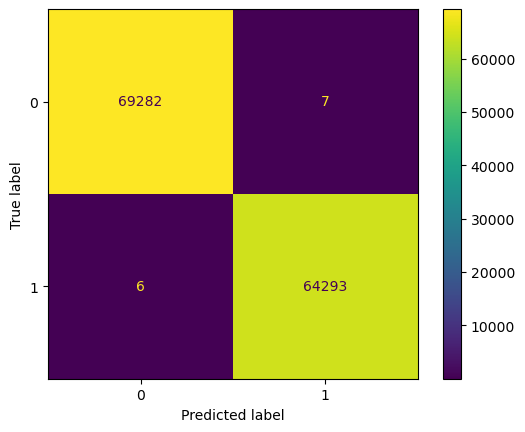

In [9]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot()


In [10]:

from sklearn.metrics import f1_score

print(f1_score(y_test, y_pred, average='macro'))
print(f1_score(y_test, y_pred, average='micro'))
print(f1_score(y_test, y_pred, average='weighted'))
print(f1_score(y_test, y_pred, average=None))

0.9999025499528678
0.9999026858699883
0.9999026858972316
[0.99990619 0.99989891]


In [11]:
test1 = [98.69,6.0,64.0,173299.3495528593,173299.3495528593,0.0,0.16,0.17,0.28,0.23,0.69,0.0,0.0,0.16,0.17,0.4,1.08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,692.09,59.08,73.78,66.11540543340388,5.319531965796487,65.31,84667047.2917197,9.5,11.491471193202509,7.499204269366774,40.138856529575065,0.9,141.55]

In [12]:
test2 = pd.array(test1)
test2.reshape(1,-1)
type(test2)

pandas.core.arrays.floating.FloatingArray

In [13]:
output = model.predict(test2)
output

c:\Users\priso\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got 1D array instead:
array=[9.8690002e+01 6.0000000e+00 6.4000000e+01 1.7329934e+05 1.7329934e+05
 0.0000000e+00 1.6000000e-01 1.7000000e-01 2.8000000e-01 2.3000000e-01
 6.9000000e-01 0.0000000e+00 0.0000000e+00 1.6000000e-01 1.7000000e-01
 4.0000001e-01 1.0800000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 1.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 1.0000000e+00 1.0000000e+00 6.9209003e+02 5.9080002e+01 7.3779999e+01
 6.6115402e+01 5.3195319e+00 6.5309998e+01 8.4667048e+07 9.5000000e+00
 1.1491471e+01 7.4992042e+00 4.0138855e+01 8.9999998e-01 1.4155000e+02].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
print(x_test.head())
y_test.head()

: 

In [ ]:
model.__dict__

: 

In [ ]:
model.predict( )

: 